GitHub repo 链接：https://github.com/quniLcs/cv-nnc

网盘链接：[百度网盘 神经网络分类器](https://pan.baidu.com/s/1hQtjDPMmQEPDIk5TRP6MwA?pwd=6bku)

# 使用模块说明

`tensorflow`：用于加载MNIST数据集；

`numpy`：用于设置随机数种子与数学计算；

`pickle`：用于保存模型；

`matplotlib.pyplot`：用于可视化；

`warnings`：用于过滤警告信息。

# 代码文件说明

`report.ipynb`：本报告的源代码，包含超参数查找、损失函数曲线、错误率曲线、网络参数可视化等部分。

`train.py`：
定义一个函数`train`，输入五个参数，
第一个参数表示网络结构，即隐藏层的神经元数量，
第二个参数表示学习率初始值，
第三个参数表示正则化参数，
第四个参数`prin_error`表示是否打印训练过程中的训练集和测试集错误率，
第五个参数`prin_loss`表示是否打印训练过程中的训练集和测试集损失函数；
函数依照训练集对训练集和测试集进行标准化处理，
用标准正态分布初始化权重，
接着进行100000个循环的随机梯度下降，
其中学习率余弦衰减，记录20次错误率和损失函数，
最后在当前目录保存模型并返回四个参数，分别表示训练过程中的训练集和测试集的错误率和损失函数；
直接运行该文件时，调用`train([100], 1e-3, 0.05, prin_error = True)`。

`test.py`：
定义一个函数`test`，输入三个参数，即函数`test`的前三个参数；
函数从当前目录加载模型、计算错误率并将其返回；
直接运行该文件时，调用`test([100], 1e-3, 0.05)`。

`predict.py`：
定义一个函数`predict`，返回三个参数，
第一个参数表示预测值，
第二个参数表示错误率，
第三个参数表示损失函数；
用于函数`test`和`predict`。

`backprop.py`：
定义一个函数`backprop`，
使用反向传播算法计算梯度并将其返回；
用于函数`test`。

# 超参数查找

对网络结构、学习率初始值、正则化参数进行搜索：

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from test import test
from train import train

先固定学习率初始值和正则化参数，对网络结构进行搜索：

In [3]:
alpha = 1e-3
lambd = 0.05
print('alpha = ', alpha, sep = '')
print('lambd = ', lambd, sep = '')
print()

print('num_hidden  error_train  error_test')
for num_hidden in range(50, 300, 50):
    # train([num_hidden], alpha, lambd)
    train_error, test_error = test([num_hidden], alpha, lambd)
    print(' ' * 5 + '[%3d]  %11.6f  %10.4f' % (num_hidden, train_error, test_error))

alpha = 0.001
lambd = 0.05

num_hidden  error_train  error_test
     [ 50]     0.087750      0.0852
     [100]     0.080933      0.0807
     [150]     0.075233      0.0778
     [200]     0.071983      0.0753
     [250]     0.068017      0.0747


可以看到，随着隐藏层的神经元数量增加，训练集和测试集的错误率降低，但训练集错误率和测试集错误率的差增加，即出现了轻微的过拟合现象；另外，随着隐藏层的神经元数量增加，参数数量和训练成本也增加。

固定隐藏层的神经元个数为`100`，对学习率初始值进行搜索：

In [4]:
num_hidden = [100]
lambd = 0.05
print('num_hidden = ', num_hidden, sep = '')
print('lambd = ', lambd, sep = '')
print()

print('alpha  error_train  error_test')
for alpha in (5e-3, 1e-3, 5e-4):
    # train([num_hidden], alpha, lambd)
    train_error, test_error = test(num_hidden, alpha, lambd)
    print('%.0e  %11.6f  %10.4f' % (alpha, train_error, test_error))

num_hidden = [100]
lambd = 0.05

alpha  error_train  error_test
5e-03     0.083900      0.0825
1e-03     0.080933      0.0807
5e-04     0.099350      0.0986


固定学习率初始值为`1e-3`，对正则化参数进行搜索：

In [5]:
num_hidden = [100]
alpha = 1e-3
print('num_hidden = ', num_hidden, sep = '')
print('alpha = ', alpha, sep = '')
print()

print('lambd  error_train  error_test')
for lambd in (0.1, 0.05, 0.01):
    # train([num_hidden], alpha, lambd)
    train_error, test_error = test(num_hidden, alpha, lambd)
    print('%.0e  %11.6f  %10.4f' % (lambd, train_error, test_error))

num_hidden = [100]
alpha = 0.001

lambd  error_train  error_test
1e-01     0.101800      0.0986
5e-02     0.080933      0.0807
1e-02     0.087317      0.0941


最终确定隐藏层的神经元个数为`100`，学习率初始值为`1e-3`，正则化参数为`0.05`。

In [6]:
num_hidden = [100]
alpha = 1e-3
lambd = 0.05

error_train, error_test, loss_train, loss_test = train(num_hidden, alpha, lambd)

# 损失函数曲线

In [7]:
import matplotlib.pyplot as plt

In [8]:
iter_max = 100000
iter_record = 20
iter_cur = range(0, iter_max, iter_max // iter_record)

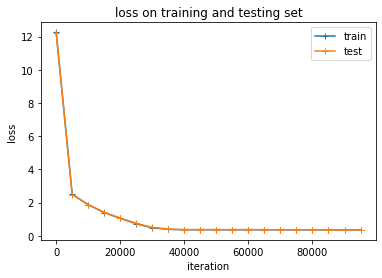

In [9]:
plt.plot(iter_cur, loss_train, '-+')
plt.plot(iter_cur, loss_test, '-+')
plt.legend(['train', 'test'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss on training and testing set')
plt.show()

# 错误率曲线

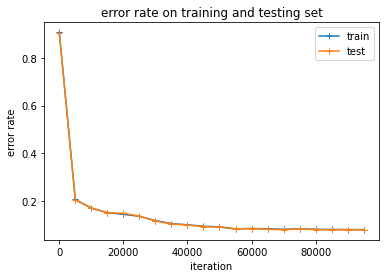

In [10]:
plt.plot(iter_cur, error_train, '-+')
plt.plot(iter_cur, error_test, '-+')
plt.legend(['train', 'test'])
plt.xlabel('iteration')
plt.ylabel('error rate')
plt.title('error rate on training and testing set')
plt.show()

# 网络参数可视化

不考虑偏置，可视化网络参数。

In [11]:
import pickle
import matplotlib.pyplot as plt

In [12]:
file_name = 'model weights with num_hidden ' + str(num_hidden) + ', alpha = ' + str(alpha) + ', lambda = ' + str(lambd) + '.dat'
with open(file_name, 'rb') as file_pointer:
    weight = pickle.load(file_pointer)

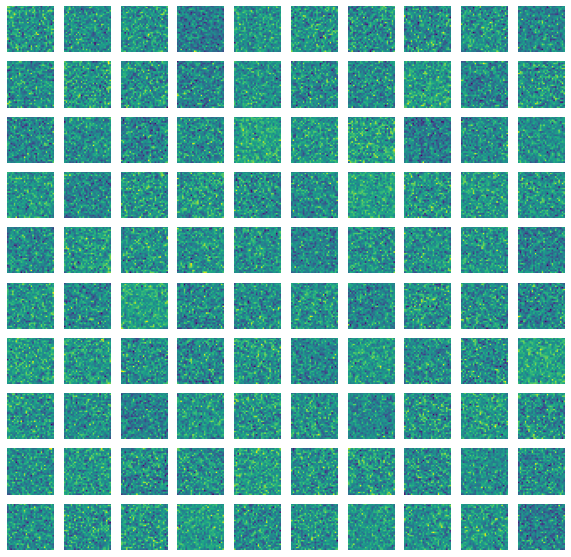

In [13]:
imgs = weight[0][:-1, :].reshape(100, 28, 28)
plt.figure(figsize = (10, 10))
for ind in range(100):
    plt.subplot(10, 10, ind + 1)
    plt.imshow(imgs[ind,:,:])
    plt.axis('off')

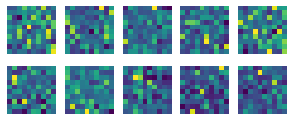

In [14]:
imgs = weight[1][:-1, :].reshape(10, 10, 10)
plt.figure(figsize = (5, 2))
for ind in range(10):
    plt.subplot(2, 5, ind + 1)
    plt.imshow(imgs[ind,:,:])
    plt.axis('off')